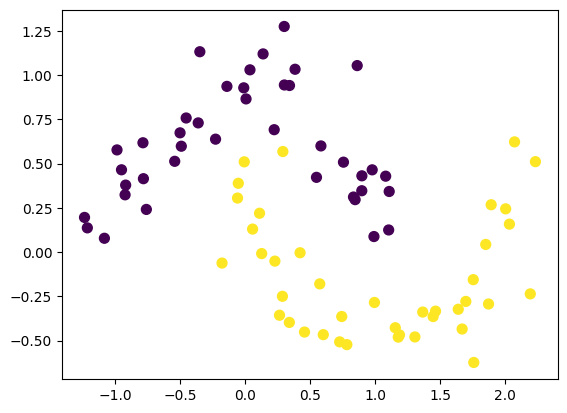

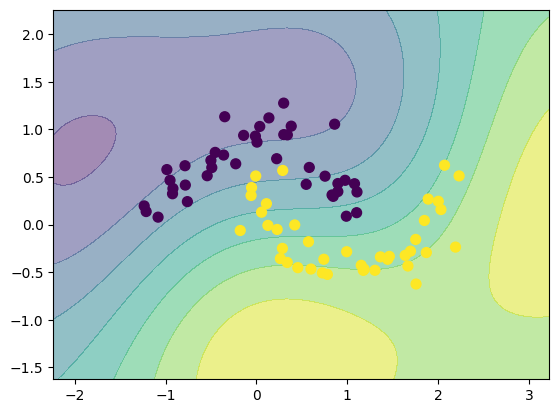

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVR

X, y = make_moons(n_samples=80, noise=0.15, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

model = SVR(kernel='rbf', C=1.0, gamma=0.2)
model.fit(X, y)

#creating a plotting mesh and predicting points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') 
plt.show()



